<a href="https://colab.research.google.com/github/Xergon-sci/Predicting-chemical-hardness-A-study-using-machine-learning-and-artificial-neural-networks/blob/master/Model2_F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization
---

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%tensorflow_version
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn;
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime

#Load tensorboard
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
df = pd.read_table("/content/drive/My Drive/vub/dataset_F1.txt", sep='\t')

#Model Architecture
---
The model itself is a neural network that consists of:
* Input layer: 10 inputs, 10 nodes with activation function relu and le Cun initializer.
* 5 Hidden layers: 10 nodes, with activation function selu
* Output layer: 1 node with activation function softplus

It implements backpropagation and early-stopping.
Optimization is applyed by the Stochastic gradient descent .

# Data preprocessing
---



In [ ]:
# Convert data to array
dataset = df.values

# Split the data into features and label
features_RAW = dataset[:,2:12]
labels_RAW = dataset[:,12]

#---------- Preprocessing the data ----------
# Get the scaler from sci-kit learn
scaler = preprocessing.MinMaxScaler()

# Scale the features and the labels = normalization
scaled_features = scaler.fit_transform(features_RAW)
scaled_labels = labels_RAW / 10

# Split the set into training and validation 70/30
training_features, v_and_t_features, training_labels, v_and_t_labels = train_test_split(scaled_features, scaled_labels, test_size=0.3)

# Split the v and t features equally
validation_features, test_features, validation_labels, test_labels = train_test_split(v_and_t_features, v_and_t_labels, test_size=0.5)

# These labels are used for training
training_labels = training_labels.astype(np.float)
validation_labels = validation_labels.astype(np.float)

# These labels are used for comparing only so they can be denormalized
test_labels = test_labels.astype(np.float)
test_labels = test_labels * 10

# Print the types of each set each set should be of type float
print('training features: ', training_features.dtype)
print('training labels: ', training_labels.dtype)
print('validation features: ', validation_features.dtype)
print('validation labels: ', validation_labels.dtype)
print('test features: ', test_features.dtype)
print('test labels: ', test_labels.dtype)

training features:  float64
training labels:  float64
validation features:  float64
validation labels:  float64
test features:  float64
test labels:  float64


# Model Assembly
---



In [ ]:
#---------- Model Declaration ----------
model = tf.keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(10,), kernel_initializer=tf.keras.initializers.lecun_normal()),
    layers.Dense(10, activation='selu'),
    layers.Dense(10, activation='selu'),
    layers.Dense(10, activation='selu'),
    layers.Dense(10, activation='selu'),
    layers.Dense(10, activation='selu'),
    layers.Dense(1, activation='softplus')
])

# Inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
#---------- Model Compilation ----------
model.compile(tf.keras.optimizers.SGD(learning_rate=0.0000001, momentum=0.99, nesterov=True),
              loss='mse',         # mean squared error
              metrics=['mae', 'mse'])    # mean absolute error

# Supplying callbacks for tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#---------- Model Training ----------
hist = model.fit(training_features,
                  training_labels,
                  batch_size=16, epochs=5000,
                  validation_data=(validation_features, validation_labels),
                  callbacks=[tensorboard_callback,
                             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0000001, patience=10)])


Streaminguitvoer ingekort tot de laatste 5000 regels.
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034
Epoch 2502/5000
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034
Epoch 2503/5000
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034
Epoch 2504/5000
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034
Epoch 2505/5000
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - val_loss: 0.0034 - val_mae: 0.0458 - val_mse: 0.0034
Epoch 2506/5000
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - mae: 0.0467 - mse: 0.0035 - v

# Model Evaluation
---



In [ ]:
model.metrics
model.evaluate(test_features, test_labels, verbose=1)

24/24 [==============================] - 0s 1ms/step - loss: 16.5324 - mae: 4.0278 - mse: 16.5324


AttributeError: ignored

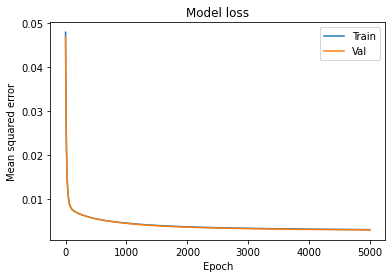

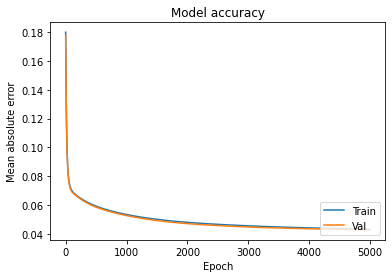

In [ ]:
plot.plot(hist.history['loss'])
plot.plot(hist.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Mean squared error')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='upper right')
plot.show()
plot.close()

plot.plot(hist.history['mae'])
plot.plot(hist.history['val_mae'])
plot.title('Model accuracy')
plot.ylabel('Mean absolute error')
plot.xlabel('Epoch')
plot.legend(['Train', 'Val'], loc='lower right')
plot.show()
plot.close()

MAE:  0.42729986
MSE:  0.29864338
RMSE:  0.54648274


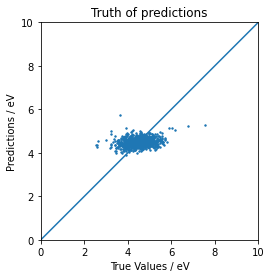

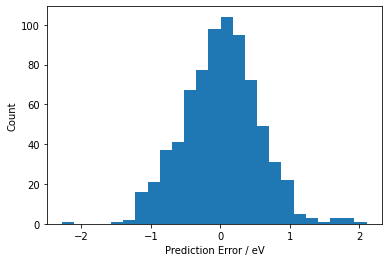

In [ ]:
# Predict the data
test_predictions = model.predict(test_features).flatten()

# Denormalize the output
test_predictions = test_predictions *10

mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(test_labels, test_predictions)

mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(test_labels, test_predictions)

rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(test_labels, test_predictions)

print('MAE: ', mae.result().numpy())
print('MSE: ', mse.result().numpy())
print('RMSE: ', rmse.result().numpy())

a = plot.axes(aspect='equal')
plot.scatter(test_labels, test_predictions, s=2)
plot.title('Truth of predictions')
plot.xlabel('True Values / eV')
plot.ylabel('Predictions / eV')
lims = [0, 10]
plot.xlim(lims)
plot.ylim(lims)
_ = plot.plot(lims, lims)
plot.show()
plot.close()

error = test_predictions - test_labels
plot.hist(error, bins = 25)
plot.xlabel("Prediction Error / eV")
_ = plot.ylabel("Count")
plot.show()
plot.close()